In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import csv

#importing mortality data from given file
def getData(filename):
    result = csv.reader(open(filename, "r"))
    csvData = list(result)
    csvData = csvData[1:]      #removing headings
    mortalitySet = []          #a list to store data after removing confidence data
    for each in csvData:
        index = each[2].index("[")
        each[2] = each[2][:index]
        index = each[4].index("[")
        each[4] = each[4][:index]
        mortalitySet.append(each)
        
    return mortalitySet
      





In [21]:
mortalityData = getData("MortalityCountry.csv")      #calling getData method to get Mortality


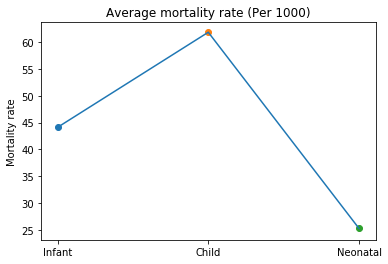

In [22]:
#plot average mortality all ages
avgChild = 0
avgInfant = 0
avgNeonatal = 0
for i in mortalityData:
    avgChild += float(i[4])
    avgInfant += float(i[2])
    avgNeonatal += float(i[3])
avgChild = avgChild/len(mortalityData)
avgInfant = avgInfant/len(mortalityData)
avgNeonatal = avgNeonatal/len(mortalityData)
fig = plt.figure()
ax = plt.axes()

plt.scatter(1,avgInfant,label="Infant")
plt.scatter(2,avgChild,label="Child")
plt.scatter(3,avgNeonatal,label="Neonatal")
plt.title("Average mortality rate (Per 1000)")
plt.ylabel("Mortality rate")
x = [1,2,3]
lining = [avgInfant,avgChild,avgNeonatal]
plt.plot(x,lining)
tag = ["Infant","Child","Neonatal"]
plt.xticks(x,tag)
plt.show()

In [23]:
#Data each region
region = {}
for x in mortalityData:
    if (x[0] in region):
        currentList = region[x[0]]
        currentList.append([x[1],x[2],x[3],x[4]])
    else :
        region[x[0]] = [[x[1],x[2],x[3],x[4]]]
        
   

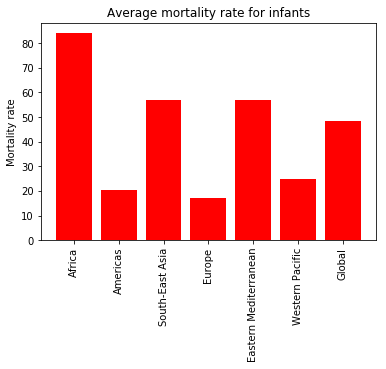

In [24]:
#calculating average for infant for each country
country = []
average = []
for key,value in region.items():
    sum = 0
    for record in value:
        sum += float(record[1])
    avg = sum/len(value)
    country.append(key)
    average.append(avg)

fig = plt.figure()
ax = plt.axes()
x = list(range(1,len(country)+1))
plt.bar(x,average,color='r')
plt.title("Average mortality rate for infants")
plt.ylabel("Mortality rate")
plt.xticks(x,country,rotation='vertical')
plt.show() 
      
    
    

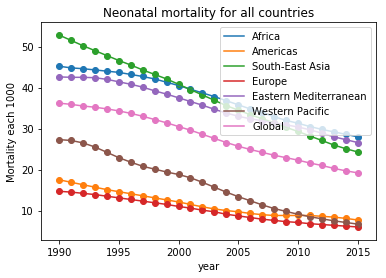

In [27]:
#Plotting coutry wise neonatal mortality for all years
fig = plt.figure()
ax = plt.axes()

for key,value in region.items():
    year = []
    mortality = []
    for data in value:
        year.append(data[0])
        mortality.append(data[2])
    plt.plot(year,mortality,label=key)
    plt.scatter(year,mortality)

plt.title("Neonatal mortality for all countries")
plt.xlabel("year")
plt.ylabel("Mortality each 1000")
plt.legend()
plt.show()
        
    
        

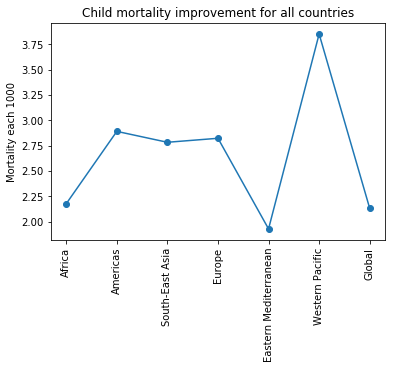

In [35]:
#Country wise improvement in child mortality
fig = plt.figure()
ax = plt.axes()

improvement = []
countries = []
for key,value in region.items():
    base = 0
    current = 0    
    for data in value:
        if(int(data[0]) == 2015):
            current = float(data[3])
        if(int(data[0]) == 1990):
            base = float(data[3])
    improve = base/current
    improvement.append(improve)
    countries.append(key)
x = list(range(0,len(countries)))
plt.scatter(x,improvement)
plt.plot(x,improvement)
plt.xticks(x,countries,rotation="vertical")         
    
plt.title("Child mortality improvement for all countries")
plt.ylabel("Mortality each 1000")
plt.show()

In [44]:
mortalityIncomeData = getData("MortalityIncome.csv") 
mortalityIncomeData = mortalityIncomeDate[1:]

In [46]:
#Data each income
incomeData = {}
for x in mortalityIncomeData:
    if (x[0] in incomeData):
        currentList = incomeData[x[0]]
        currentList.append([x[1],x[2],x[3],x[4]])
    else :
        incomeData[x[0]] = [[x[1],x[2],x[3],x[4]]]

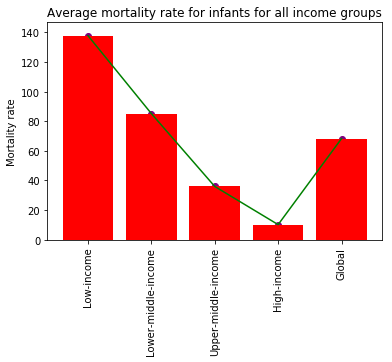

In [51]:
#calculating average for child mortality for each income
income = []
average = []
for key,value in incomeData.items():
    sum = 0
    for record in value:
        sum += float(record[3])
    avg = sum/len(value)
    income.append(key)
    average.append(avg)

fig = plt.figure()
ax = plt.axes()
x = list(range(1,len(income)+1))
plt.bar(x,average,color='r')
plt.plot(x,average,color="green")
plt.scatter(x,average,color="purple")
plt.title("Average mortality rate for infants for all income groups")
plt.ylabel("Mortality rate")
plt.xticks(x,income,rotation='vertical')
plt.show() 